<a href="https://colab.research.google.com/github/amandaocalvo/furry-waddle/blob/main/Titanic_ArvoreDeDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITANIC - Árvore de Decisão 

In [ ]:
# Avaliando dados do Titanic - sobrevivência

# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('titanictrain.csv')
submission = pd.read_csv('titanictest.csv')

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
submission.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
submission.shape

(418, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Remoção de features
def count_unique(df):
  print("Quantidade de valores únicos para cada feature")
  for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

In [ ]:
count_unique(df)

Quantidade de valores únicos para cada feature
PassengerId: 891
Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 147
Embarked: 3


In [ ]:
columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df = df.drop(columns, axis=1)

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
df.shape

(891, 8)

Análise exploratória

Survived

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

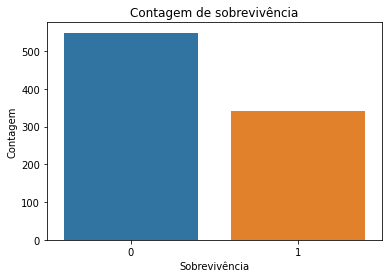

In [ ]:
sns.countplot(data=df, x = 'Survived')
plt.title("Contagem de sobrevivência")
plt.xlabel('Sobrevivência')
plt.ylabel('Contagem')
plt.show()

In [ ]:
print(f"Considerando nosso conjunto de dados, {df.Survived.value_counts()[0]/df.shape[0]*100:.2f}% dos passageiros não sobreviveram ao naufrágio :(")

Considerando nosso conjunto de dados, 61.62% dos passageiros não sobreviveram ao naufrágio :(


Pclass

In [ ]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

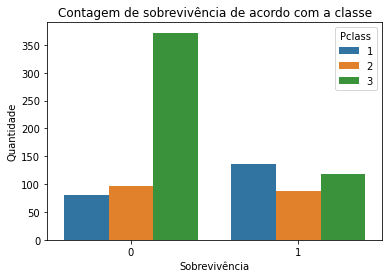

In [ ]:
p = sns.countplot(data=df, x = 'Survived', hue = 'Pclass')
plt.title("Contagem de sobrevivência de acordo com a classe")
plt.xlabel("Sobrevivência")
plt.ylabel("Quantidade")
plt.show()

In [ ]:
# proporção de sobrevivência por classe
df[["Pclass", "Survived"]].groupby(['Pclass']).mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


Sex

In [ ]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

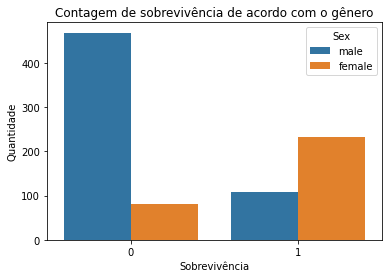

In [ ]:
p = sns.countplot(data=df, x = 'Survived', hue = 'Sex')
plt.title("Contagem de sobrevivência de acordo com o gênero")
plt.xlabel("Sobrevivência")
plt.ylabel("Quantidade")
plt.show()

In [ ]:
# proporção de sobrevivência por gênero
df[["Sex", "Survived"]].groupby(['Sex']).mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


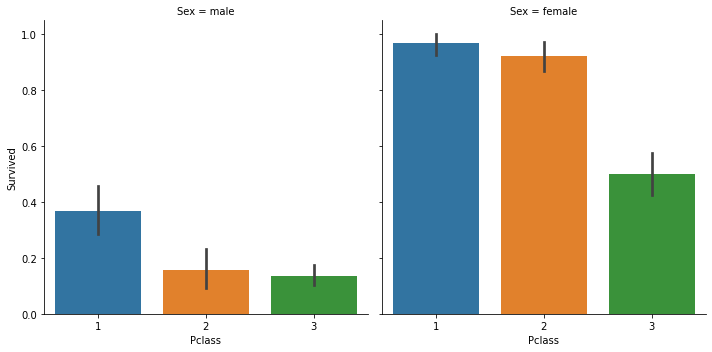

In [ ]:
sns.catplot(x="Pclass", y="Survived", col="Sex", data=df,kind="bar");

Age

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


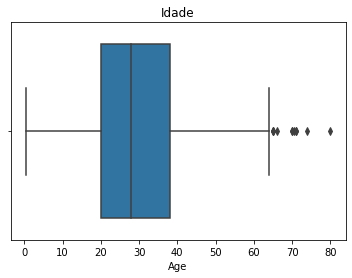

In [ ]:
_ = sns.boxplot(df['Age']).set_title("Idade")

In [ ]:
# ignorando os nulos das idades

survived_age_not_null = df.loc[(df.Survived == 1) & (df.Age.isnull()==False), 'Age']
not_survived_age_not_null = df.loc[(df.Survived == 0) & (df.Age.isnull()==False), 'Age']

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


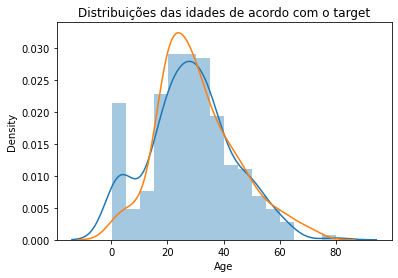

In [ ]:
sns.distplot(survived_age_not_null, hist=True, label='Sobreviveu')
sns.distplot(not_survived_age_not_null, hist=False, label='Não sobreviveu')
_ = plt.title("Distribuições das idades de acordo com o target")

Fare

In [ ]:
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

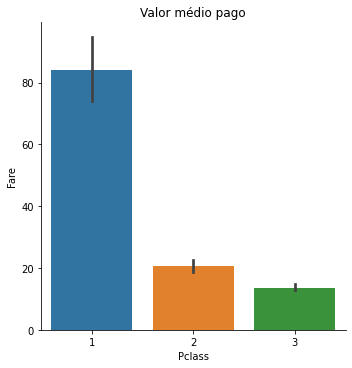

In [ ]:
sns.catplot(x="Pclass", y="Fare", data=df,
            kind="bar").set(title="Valor médio pago");

In [ ]:
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


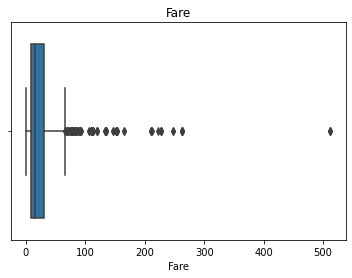

In [ ]:
_ = sns.boxplot(df['Fare']).set_title("Fare")

Família (SibSp e Parch)

In [ ]:
# calculando tamanho da família

df['Family'] = (df.SibSp + df.Parch).abs()

In [ ]:
df.Family.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

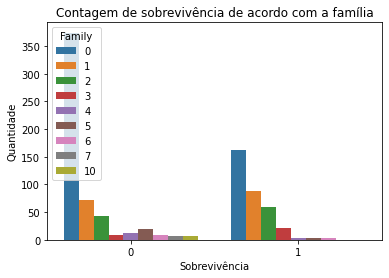

In [ ]:
p = sns.countplot(data=df, x = 'Survived', hue = 'Family')
plt.title("Contagem de sobrevivência de acordo com a família")
plt.xlabel("Sobrevivência")
plt.ylabel("Quantidade")
plt.show()

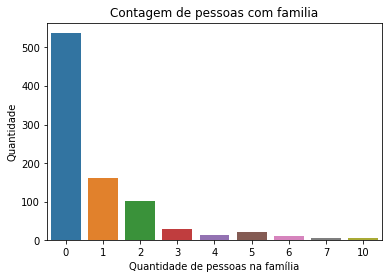

In [ ]:
p = sns.countplot(data=df, x = 'Family')
plt.title("Contagem de pessoas com familia")
plt.xlabel("Quantidade de pessoas na família")
plt.ylabel("Quantidade")
plt.show()

Porto de embarque

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

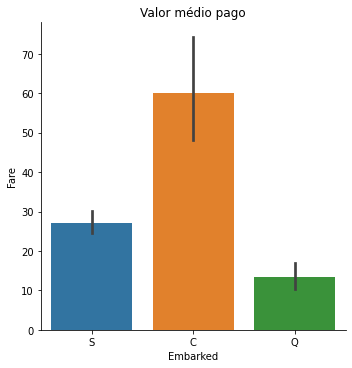

In [ ]:
sns.catplot(x="Embarked", y="Fare", data=df,
            kind="bar").set(title="Valor médio pago");

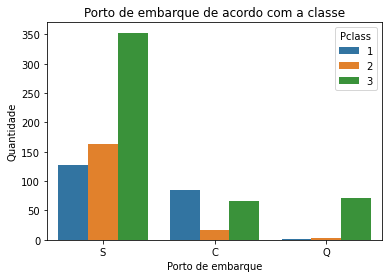

In [ ]:
p = sns.countplot(data=df, x = 'Embarked', hue = 'Pclass')
plt.title("Porto de embarque de acordo com a classe")
plt.xlabel("Porto de embarque")
plt.ylabel("Quantidade")
plt.show()

Mapa de calor

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


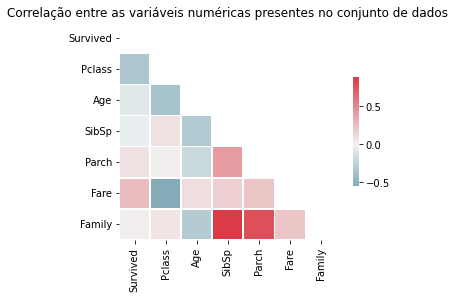

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Correlação entre as variáveis numéricas presentes no conjunto de dados");

Feature Engineering

Tratamento de valores faltantes (missing values)

In [ ]:
median_age = df['Age'].median() 
df.loc[df['Age'].isnull(), 'Age'] = median_age

Conversão de features categóricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

# ao invés do LabelEncoder, também poderíamos ter feito só um map e passar as transformações que queríamos:
# df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1})

In [ ]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [ ]:
df['binnedage']=pd.cut(df['Age'], bins=3, right=True, labels=False)+1

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,binnedage
0,0,3,1,22.0,1,0,7.2500,S,1,1
1,1,1,0,38.0,1,0,71.2833,C,1,2
2,1,3,0,26.0,0,0,7.9250,S,0,1
3,1,1,0,35.0,1,0,53.1000,S,1,2
4,0,3,1,35.0,0,0,8.0500,S,0,2


In [ ]:
df['binnedage']=pd.cut(df['Age'], bins=[0,15,30,60,100], right=True, labels=False)+1

In [ ]:
df.head(40)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,binnedage
0,0,3,1,22.0,1,0,7.2500,S,1,2
1,1,1,0,38.0,1,0,71.2833,C,1,3
2,1,3,0,26.0,0,0,7.9250,S,0,2
3,1,1,0,35.0,1,0,53.1000,S,1,3
4,0,3,1,35.0,0,0,8.0500,S,0,3
5,0,3,1,28.0,0,0,8.4583,Q,0,2
6,0,1,1,54.0,0,0,51.8625,S,0,3
7,0,3,1,2.0,3,1,21.0750,S,4,1
8,1,3,0,27.0,0,2,11.1333,S,2,2
9,1,2,0,14.0,1,0,30.0708,C,1,1


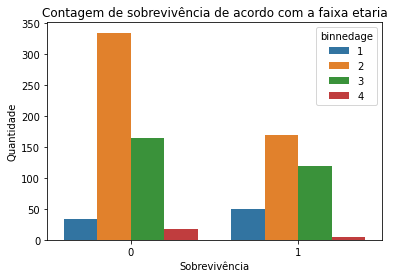

In [ ]:
p = sns.countplot(data=df, x = 'Survived', hue = 'binnedage')
plt.title("Contagem de sobrevivência de acordo com a faixa etaria")
plt.xlabel("Sobrevivência")
plt.ylabel("Quantidade")
plt.show()

Treinamento

In [ ]:
# nossas features
x = df[['binnedage', 'Sex', 'Pclass', 'Family']]

# nosso target
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

# Separando os dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciando o classificador
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Treinamento do modelo
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# arquivo de texto que armazena a estrutura da nossa árvore de decisão
from sklearn.tree import export_graphviz
export_graphviz(model,out_file='titanic_tree.dot',feature_names=['binnedage', 'Sex', 'Pclass','Family'],rounded=True,filled=True,class_names=['Não sobreviveu','Sobreviveu'])
!dot -Tpng titanic_tree.dot -o titanic_tree.png

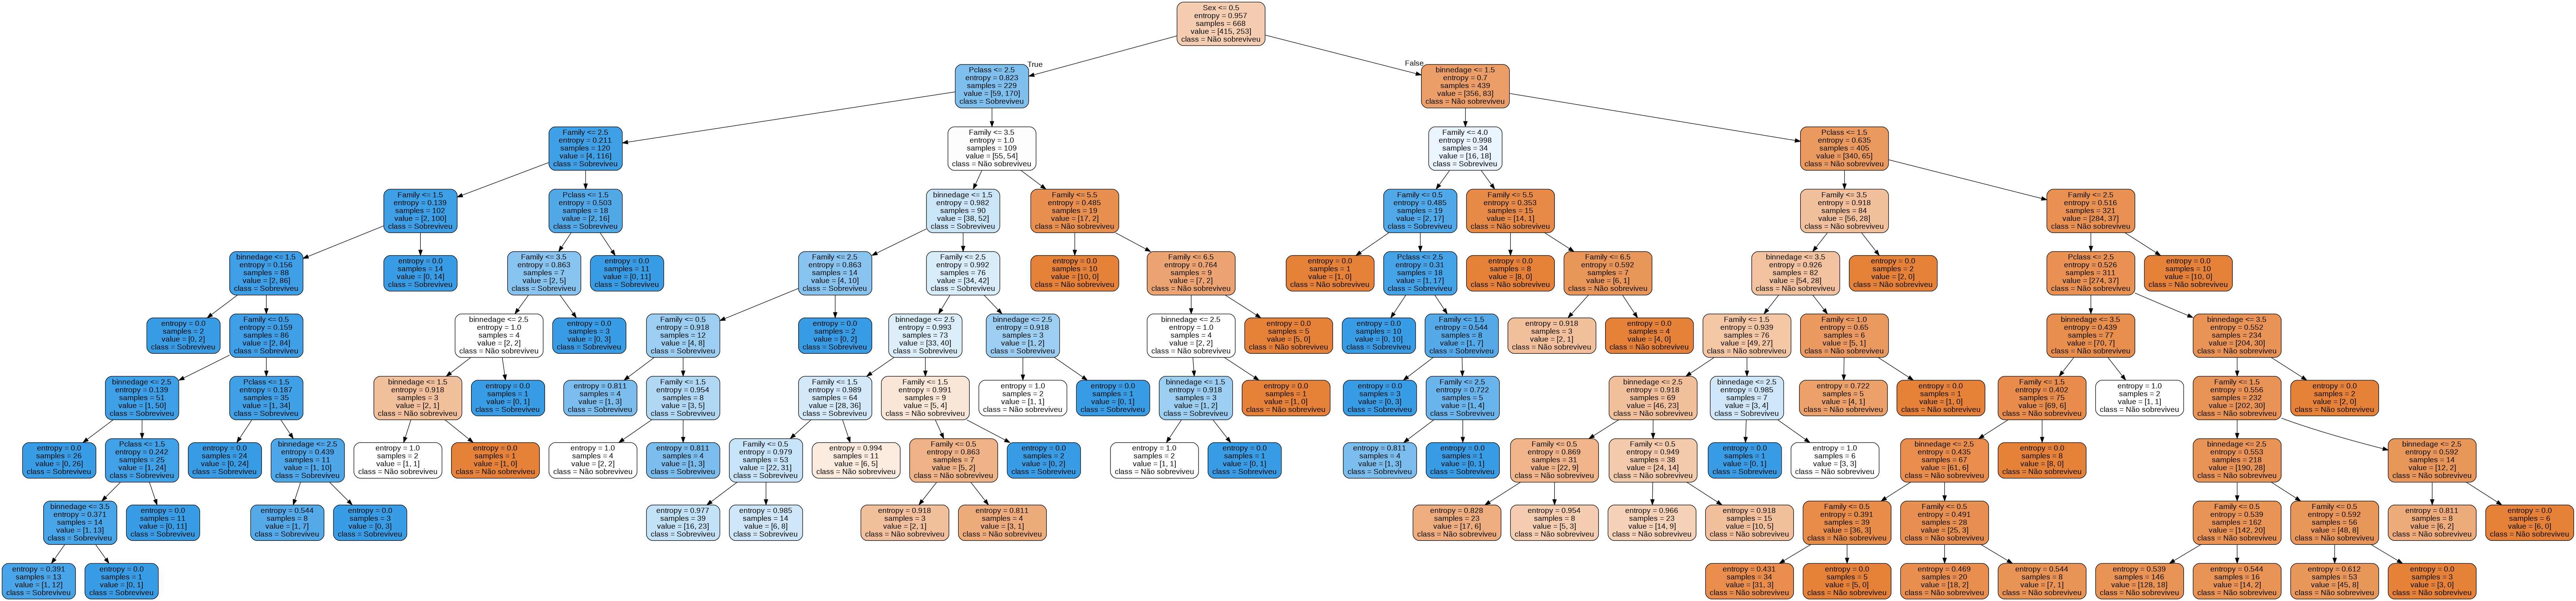

In [ ]:
from IPython.core.display import Image, display
display(Image('titanic_tree.png', width=1900, unconfined=True))

Avaliando o modelo

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_probs = model.predict_proba(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8116591928251121

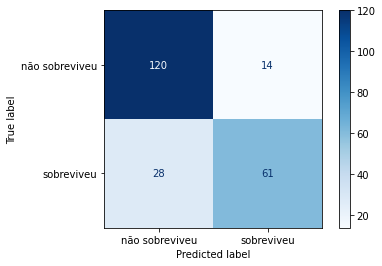

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import itertools
cnf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=[ 'não sobreviveu', 'sobreviveu'])
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(y_test, y_pred, target_names=['não sobreviveu', 'sobreviveu']))

                precision    recall  f1-score   support

não sobreviveu       0.81      0.90      0.85       134
    sobreviveu       0.81      0.69      0.74        89

      accuracy                           0.81       223
     macro avg       0.81      0.79      0.80       223
  weighted avg       0.81      0.81      0.81       223



In [ ]:
from sklearn.metrics import roc_curve, auc

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc(fpr, tpr)

0.7904578232433339

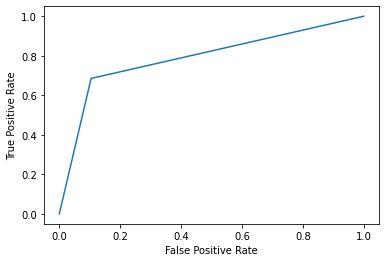

In [ ]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Interpretabilidade

In [ ]:
!pip install git+https://github.com/slundberg/shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/slundberg/shap to /tmp/pip-req-build-v7aqcw0p
  Running command git clone -q https://github.com/slundberg/shap /tmp/pip-req-build-v7aqcw0p
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
import shap

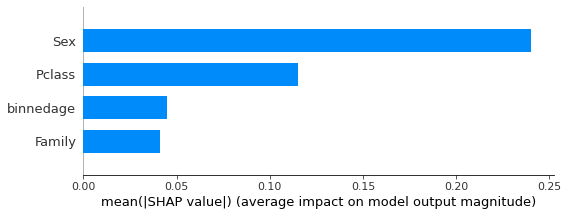

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values[1], x_train, plot_type='bar')